Aim: Use the wine.csv dataset to realize the Principal Component Analysis technique.

In [18]:
!curl https://ocw.mit.edu/courses/15-097-prediction-machine-learning-and-statistics-spring-2012/bb222ea44cb14f4d9f8729328cd08a21_wine.csv --output wine.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10960  100 10960    0     0  63051      0 --:--:-- --:--:-- --:--:-- 63352


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
data = pd.read_csv('wine.csv')
print(data.shape)

(177, 14)


In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
pca = PCA(n_components=3)

X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
pca_df['Target'] = y.values

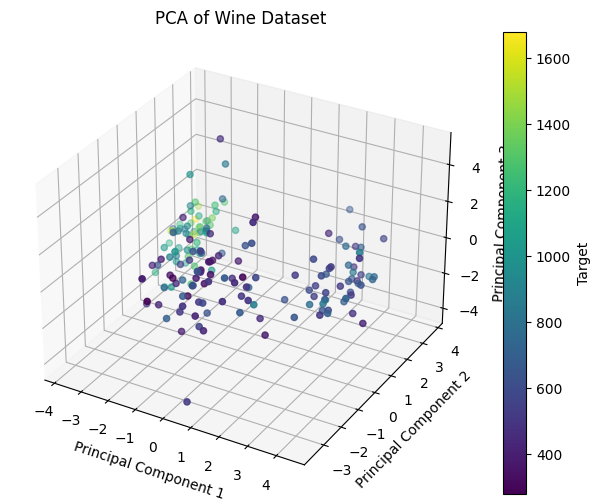

In [23]:
# plot pca in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], pca_df['Principal Component 3'], c=pca_df['Target'], cmap='viridis')
ax.set_title('PCA of Wine Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
fig.colorbar(scatter, label='Target')
plt.show()

In [24]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = y.values

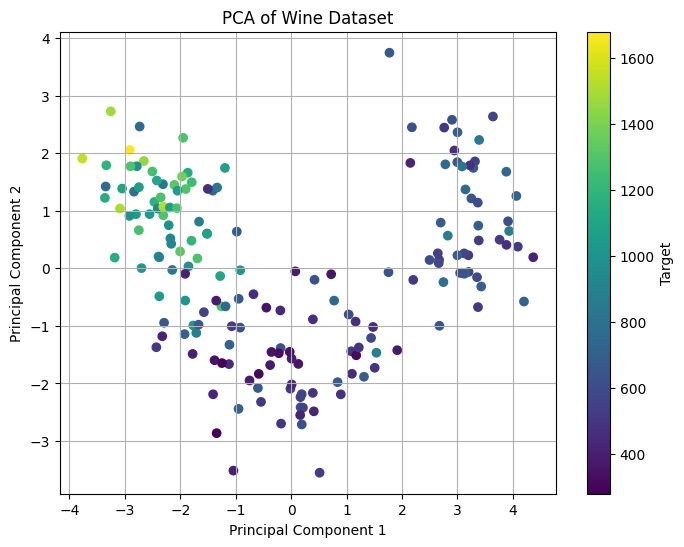

In [25]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Target'], cmap='viridis')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Target')
plt.grid()
plt.show()

In [26]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

Explained variance by each component: [0.39799157 0.16751901]
